In [15]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from scipy import ndimage

from google.colab.patches import cv2_imshow

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


(720, 576)


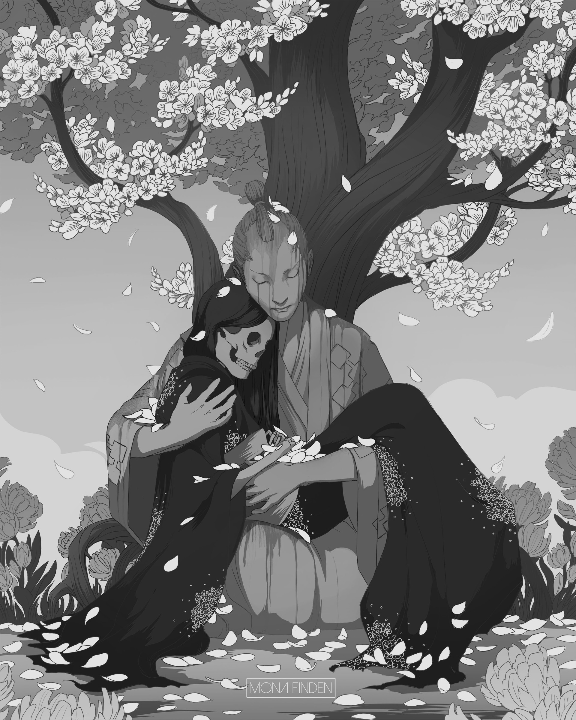

In [3]:
path = "/content/drive/MyDrive/Colab Notebooks/mona-finden-lovestory.jpg"
scale = 0.3
img = cv2.imread(path)
img = cv2.cvtColor(img, code=cv2.COLOR_BGR2GRAY)
# img = cv2.imread(path, flags=cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img, dsize=((int)(img.shape[1] * scale),(int)(img.shape[0] * scale)))

print(img.shape)
cv2_imshow(img)

In [28]:
def threshold(img, threshold:int=127, maxVal:int=255):
    re = np.zeros_like(img)
    h, w = img.shape
    for i in range(h):
        for j in range(w):
            re[i, j] = maxVal if (img[i, j] > threshold) else 0
    return re

def adaptive_mean_threshold(img, maxVal=255, blockSize=3, c=10):
    re = np.zeros_like(img)
    h, w = img.shape
    p = blockSize // 2

    # for i in range(p, h - p):
    #     for j in range(p, w - p):
    #         try:
    #             threshold = (img[i - p: i + p, j - p: j + p].mean() - c)
    #             re[i, j] = maxVal if (img[i, j] > threshold) else 0
    #         except IndexError as e:
    #             pass
    
    k = np.ones(shape=(blockSize, blockSize)) / (blockSize * blockSize)
    kmat = ndimage.convolve(img, k) - c

    for i in range(p, h - p):
        for j in range(p, w - p):
            try:
                re[i, j] = maxVal if (img[i, j] > kmat[i, j]) else 0
            except IndexError as e:
                pass

    return re

def erode(img, kernel):
    re = np.zeros_like(img)
    h, w = re.shape
    kh, kw = kernel.shape
    rh, rw = kh // 2, kw // 2
    # for i in range(rh, h - rh):
    #     for j in range(rw, w - rw):
    #         try:
    #             re[i, j] = 0 if (img[i - rh:i + rh, j - rw:j + rw].min()==0) else 255
    #         except IndexError as e:
    #             pass
    for i in range(h):
        for j in range(w):
            try:
                re[i, j] = 0 if (img[i - rh:i + rh, j - rw:j + rw].min() == 0) else 255
            except ValueError as e:
                pass
    return re

def dilate(img, kernel):
    re = np.zeros_like(img)
    h, w = re.shape
    kh, kw = kernel.shape
    rh, rw = kh // 2, kw // 2
    for i in range(h):
        for j in range(w):
            try:
                re[i, j] = 255 if (img[i - rh:i + rh, j - rw:j + rw].max() == 255) else 0
            except ValueError as e:
                pass
    return re

def opening(img, kernel):
    e = erode(img, kernel)
    return dilate(e, kernel)

def closing(img, kernel):
    d = dilate(img, kernel)
    return erode(d, kernel) 

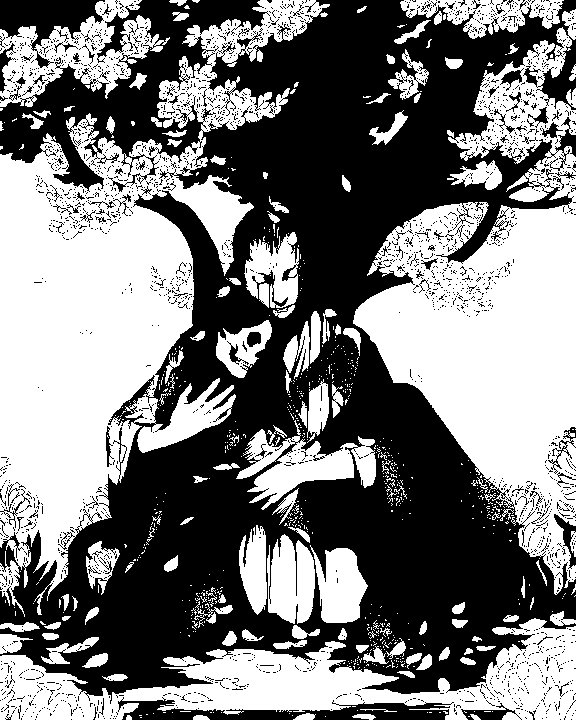

In [5]:
# th = adaptive_mean_threshold(img)
# cv2_imshow(th)

th = threshold(img)
cv2_imshow(th)

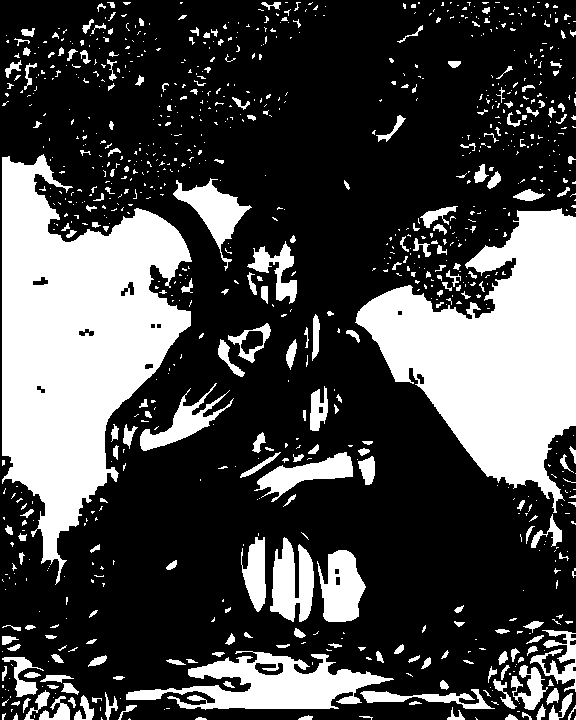

In [18]:
k = np.ones(shape=(5,5))
e = erode(th, k)

cv2_imshow(e)

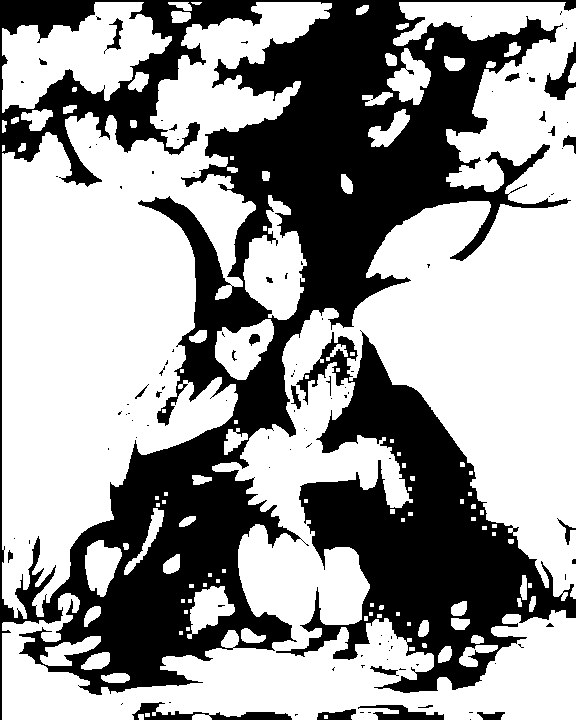

In [20]:
d = dilate(th, k)

cv2_imshow(d)

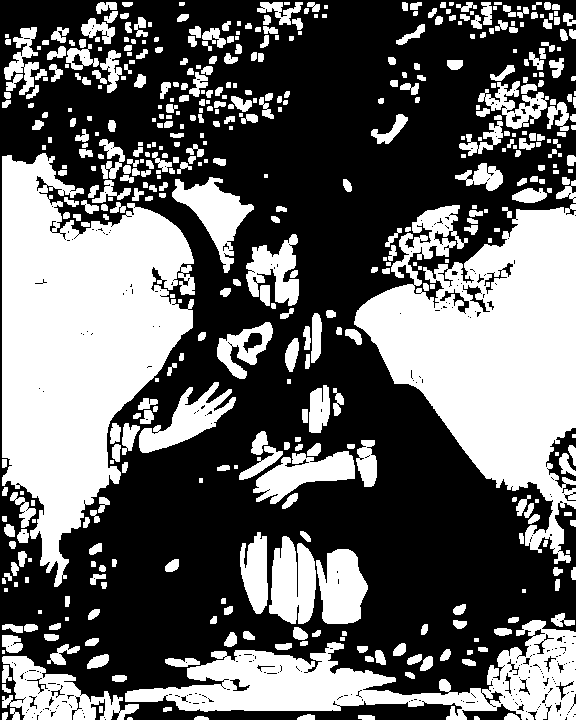

In [30]:
o = opening(th, k)

cv2_imshow(o)

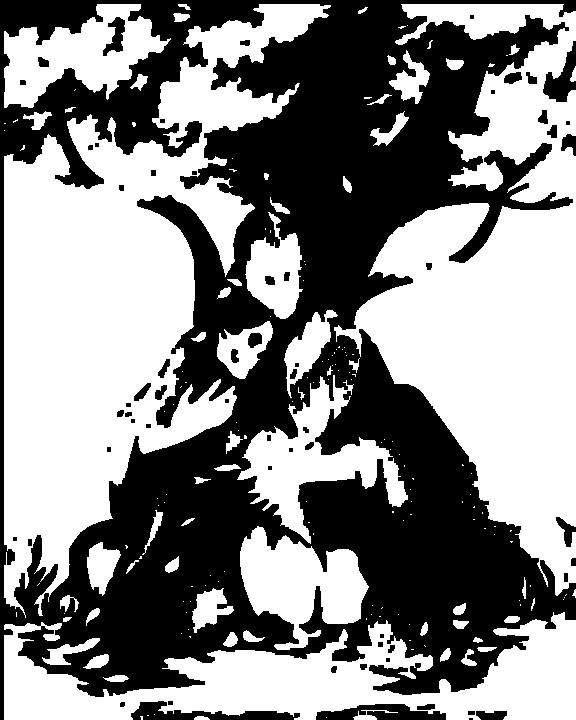

In [31]:
c = closing(th, k)

cv2_imshow(c)